In [33]:
import numpy as np
import matplotlib.pyplot as plt
from findpeaks import findpeaks

In [139]:
file = "Chart1"

In [140]:
def conv(x):
    return x.replace(',', '.').encode()

data = np.genfromtxt((conv(x) for x in open(file+".csv")), delimiter=';')

In [141]:
data[1,0]

0.0

In [142]:
grunnfrekvens = data[1,4]

frekvenser = data[1:,0]
amplitude = data[1:,1]
deltaF = data[2,0] - data[1,0]

#Henter dataen vi noterte rett fra regnearket
skfBSF = data[3,2:4] #[frekvens, amplitude]
skfBPFO = data[1,2:4]
skfBPFI = data[2,2:4]
skfGrunnFrekvens = data[1,4:6]

print(f"Turtall = {skfGrunnFrekvens[0]*60:.2f} RPM")
print(f"Grunnfrekvens = {skfGrunnFrekvens[0]:.2f} Hz\t amplitude = {skfGrunnFrekvens[1]:.4f}")
print(f"BSF = {skfBSF[0]:.2f} Hz\t\t\t amplitude = {skfBSF[1]:.4f}")
print(f"BPFO = {skfBPFO[0]:.2f} Hz\t\t amplitude = {skfBPFO[1]:.4f}")
print(f"BPFI = {skfBPFI[0]:.2f} Hz\t\t amplitude = {skfBPFI[1]:.4f}")

Turtall = 1509.18 RPM
Grunnfrekvens = 25.15 Hz	 amplitude = 0.1070
BSF = 65.65 Hz			 amplitude = 0.0020
BPFO = 102.50 Hz		 amplitude = 0.0070
BPFI = 149.03 Hz		 amplitude = 0.0030


In [143]:
data[1,2:3]

array([102.5])

In [144]:
Nb = 10
Bd = 4.7
Pd = (34.9 + 15.9)/2
theta = 0

#Kulepassering
beregnaBSF = (Pd/(2*Bd))*(1-((Bd/Pd)**2)*(np.cos(theta)**2))*grunnfrekvens

#Ytterring
beregnaBPFO = (Nb/2)*(1-(Bd/Pd)*np.cos(theta))*grunnfrekvens

#Innerring
beregnaBPFI = (Nb/2)*(1+(Bd/Pd)*np.cos(theta))*grunnfrekvens

print(f"BSF = {beregnaBSF:.2f}")
print(f"BPFO = {beregnaBPFO:.2f}")
print(f"BPFI = {beregnaBPFI:.2f}")

BSF = 65.64
BPFO = 102.49
BPFI = 149.04


(0.0, 200.0)

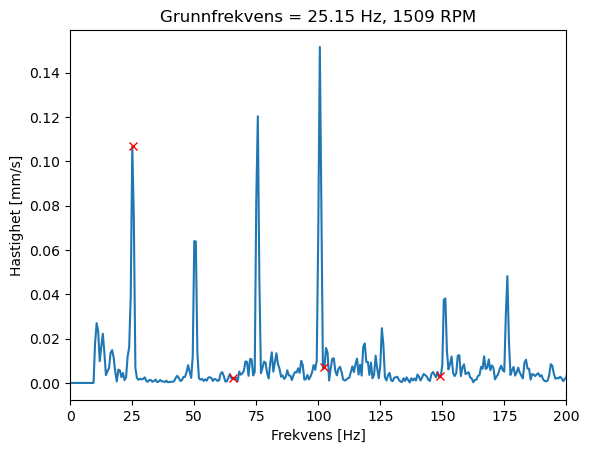

In [145]:
maxPlotFrekvens = round(grunnfrekvens)*8
plt.plot(frekvenser, amplitude)
plt.plot(skfGrunnFrekvens[0], skfGrunnFrekvens[1],"xr")
plt.plot(skfBSF[0], skfBSF[1],"xr" )
plt.plot(skfBPFO[0], skfBPFO[1],"xr")
plt.plot(skfBPFI[0], skfBPFI[1],"xr")
plt.title(f"Grunnfrekvens = {grunnfrekvens:.2f} Hz, {grunnfrekvens*60:.0f} RPM")
plt.xlabel("Frekvens [Hz]")
plt.ylabel("Hastighet [mm/s]")
plt.xlim(0,maxPlotFrekvens)

[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..


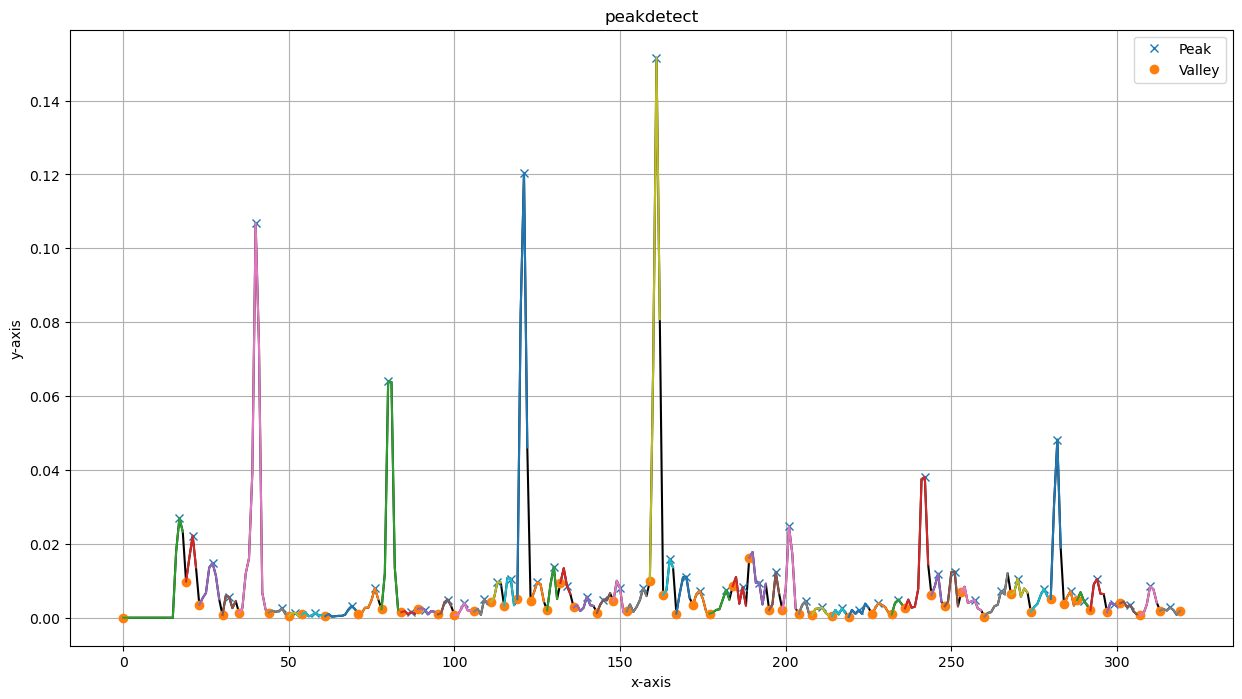

In [146]:
maxPlotIndex = round(maxPlotFrekvens/deltaF)

fp = findpeaks(lookahead=1)
results = fp.fit(amplitude[0:maxPlotIndex])
#results = fp.fit(amplitude[0:maxPlotIndex], frekvenser[0:maxPlotIndex])
# Plot
fig, ax = fp.plot()

In [147]:
results

{'df':        x       y  labx  valley   peak
 0      0  0.0000   1.0    True  False
 1      1  0.0000   1.0   False  False
 2      2  0.0000   1.0   False  False
 3      3  0.0000   1.0   False  False
 4      4  0.0000   1.0   False  False
 ..   ...     ...   ...     ...    ...
 315  315  0.0020  56.0   False  False
 316  316  0.0028  56.0   False   True
 317  317  0.0021  56.0   False  False
 318  318  0.0008  56.0   False  False
 319  319  0.0018  56.0    True  False
 
 [320 rows x 5 columns]}